<a href="https://colab.research.google.com/github/orangegreen212/AI-Marketing-Agent-/blob/main/RFM_analysis_and_segment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#RFM analysis and User Behavioral Profile using Clustering


# Import  and preprocessing dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import timedelta
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Data for GC/Marketing Juwelery/juwelery.csv")
data

,Unnamed: 0,event_time,event_type,product_id,category_id,brand,price,user_id,user_session
0,0,2019-10-01 00:00:00 UTC,cart,5773203,1487580005134238553,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
1,1,2019-10-01 00:00:03 UTC,cart,5773353,1487580005134238553,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
2,2,2019-10-01 00:00:07 UTC,cart,5881589,2151191071051219817,lovely,13.48,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
3,3,2019-10-01 00:00:07 UTC,cart,5723490,1487580005134238553,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
4,4,2019-10-01 00:00:15 UTC,cart,5881449,1487580013522845895,lovely,0.56,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
...,...,...,...,...,...,...,...,...,...
20692835,20692835,2020-02-29 23:59:32 UTC,view,5885416,1487580005092295511,grattol,6.27,622082947,fb29909b-6ef5-4662-b4ee-288e73e5dc10
20692836,20692836,2020-02-29 23:59:39 UTC,cart,5550686,1487580008145748965,unknown,1.11,459705611,05d2add3-01f7-47ee-8364-27341673227f
20692837,20692837,2020-02-29 23:59:45 UTC,view,5850628,1602943681873052386,grattol,5.24,622090043,ab7d349f-db5d-4790-8ab1-31e5c894459d
20692838,20692838,2020-02-29 23:59:54 UTC,view,5716351,1487580010872045658,irisk,0.79,619841242,18af673b-7fb9-4202-a66d-5c855bc0fd2d


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20692840 entries, 0 to 20692839
Data columns (total 9 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Unnamed: 0    int64  
 1   event_time    object 
 2   event_type    object 
 3   product_id    int64  
 4   category_id   int64  
 5   brand         object 
 6   price         float64
 7   user_id       int64  
 8   user_session  object 
dtypes: float64(1), int64(4), object(4)
memory usage: 1.4+ GB


In [5]:
full_format = '%Y-%m-%d %H:%M:%S UTC'
data['event_time'] = pd.to_datetime(data['event_time'].str.strip(), format=full_format)

In [6]:
# Create time labels
data['date'] = data['event_time'].dt.date
data['hour'] = data['event_time'].dt.hour
data['dayofweek'] = data['event_time'].dt.dayofweek
data['is_weekend'] = data['dayofweek'].isin([5, 6])
print(data[['event_time', 'date', 'hour', 'dayofweek', 'is_weekend']].head())

           event_time        date  hour  dayofweek  is_weekend
0 2019-10-01 00:00:00  2019-10-01     0          1       False
1 2019-10-01 00:00:03  2019-10-01     0          1       False
2 2019-10-01 00:00:07  2019-10-01     0          1       False
3 2019-10-01 00:00:07  2019-10-01     0          1       False
4 2019-10-01 00:00:15  2019-10-01     0          1       False


In [7]:
data

,Unnamed: 0,event_time,event_type,product_id,category_id,brand,price,user_id,user_session,date,hour,dayofweek,is_weekend
0,0,2019-10-01 00:00:00,cart,5773203,1487580005134238553,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,2019-10-01,0,1,False
1,1,2019-10-01 00:00:03,cart,5773353,1487580005134238553,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,2019-10-01,0,1,False
2,2,2019-10-01 00:00:07,cart,5881589,2151191071051219817,lovely,13.48,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,2019-10-01,0,1,False
3,3,2019-10-01 00:00:07,cart,5723490,1487580005134238553,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,2019-10-01,0,1,False
4,4,2019-10-01 00:00:15,cart,5881449,1487580013522845895,lovely,0.56,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,2019-10-01,0,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20692835,20692835,2020-02-29 23:59:32,view,5885416,1487580005092295511,grattol,6.27,622082947,fb29909b-6ef5-4662-b4ee-288e73e5dc10,2020-02-29,23,5,True
20692836,20692836,2020-02-29 23:59:39,cart,5550686,1487580008145748965,unknown,1.11,459705611,05d2add3-01f7-47ee-8364-27341673227f,2020-02-29,23,5,True
20692837,20692837,2020-02-29 23:59:45,view,5850628,1602943681873052386,grattol,5.24,622090043,ab7d349f-db5d-4790-8ab1-31e5c894459d,2020-02-29,23,5,True
20692838,20692838,2020-02-29 23:59:54,view,5716351,1487580010872045658,irisk,0.79,619841242,18af673b-7fb9-4202-a66d-5c855bc0fd2d,2020-02-29,23,5,True


# RFM Analysis

In [8]:
data['event_type'].unique()

array(['cart', 'view', 'remove_from_cart', 'purchase'], dtype=object)

In [9]:
# Create a DataFrame with only purchase events
purchases_df = data[data['event_type'] == 'purchase'].copy()

# 2. Define the snapshot date from which we will calculate Recency
snapshot_date = purchases_df['event_time'].max() + timedelta(days=1)
print(f"Snapshot date for Recency calculation (snapshot_date): {snapshot_date.date()}")

Snapshot date for Recency calculation (snapshot_date): 2020-03-01


In [10]:
# Group by user_id and calculate R, F, M
rfm_df = purchases_df.groupby('user_id').agg(
    # Recency: how many days have passed from the snapshot_date to the customer's last purchase
    Recency=('event_time', lambda date: (snapshot_date - date.max()).days),

    # Frequency: the number of unique purchases (or transactions)
    Frequency=('event_type', 'count'),

    # Monetary: the total amount of money spent by the customer
    Monetary=('price', 'sum')
)

# Check the result
print("\nRFM Table:")
print(rfm_df.head())


RFM Table:
          Recency  Frequency  Monetary
user_id                               
9794320        97          4     12.68
10079204      116          2     25.81
10280338       11         86    177.83
12055855       72          4     16.54
12936739       44          2     29.89


In [11]:
# Create labels for the quantiles
r_labels = [5, 4, 3, 2, 1]  # The fewer days, the higher the score (5)
f_labels = [1, 2, 3, 4, 5]  # The more purchases, the higher the score (5)
m_labels = [1, 2, 3, 4, 5]  # The larger the amount, the higher the score (5)

# Create columns with RFM scores
# `duplicates='drop'` is needed in case the quantile boundaries are not unique
rfm_df['R_score'] = pd.qcut(rfm_df['Recency'], q=5, labels=r_labels, duplicates='drop')
rfm_df['F_score'] = pd.qcut(rfm_df['Frequency'], q=5, labels=f_labels, duplicates='drop')
rfm_df['M_score'] = pd.qcut(rfm_df['Monetary'], q=5, labels=m_labels, duplicates='drop')

# Check the result
print("\nRFM table with scores:")
print(rfm_df.head())


RFM table with scores:
          Recency  Frequency  Monetary R_score F_score M_score
user_id                                                       
9794320        97          4     12.68       2       2       1
10079204      116          2     25.81       1       1       3
10280338       11         86    177.83       5       5       5
12055855       72          4     16.54       3       2       2
12936739       44          2     29.89       4       1       3


In [12]:
# Convert scores to strings and concatenate
rfm_df['RFM_Score'] = rfm_df['R_score'].astype(str) + rfm_df['F_score'].astype(str) + rfm_df['M_score'].astype(str)

print("\nRFM table with the final RFM Score:")
print(rfm_df.head())


RFM table with the final RFM Score:
          Recency  Frequency  Monetary R_score F_score M_score RFM_Score
user_id                                                                 
9794320        97          4     12.68       2       2       1       221
10079204      116          2     25.81       1       1       3       113
10280338       11         86    177.83       5       5       5       555
12055855       72          4     16.54       3       2       2       322
12936739       44          2     29.89       4       1       3       413


In [13]:
# Create a list of conditions
# Each condition checks if the RFM_Score matches a specific pattern
conditions = [
    # The best of the best
    (rfm_df['RFM_Score'].str.match(r'[4-5][4-5][1-5]')),

    # Loyal, but NOT champions (e.g., R=3 or F=3)
    (rfm_df['RFM_Score'].str.match(r'[3-5][3-5][1-5]')) & (~rfm_df['RFM_Score'].str.match(r'[4-5][4-5][1-5]')),

    # Promising (recent, but not yet very frequent buyers, NOT newcomers)
    (rfm_df['RFM_Score'].str.match(r'[4-5][2-3][1-5]')),

    # New Customers (recent, but only 1 purchase)
    (rfm_df['RFM_Score'].str.match(r'[4-5]1[1-5]')),

    # Customers you can't lose (bought a lot, but a long time ago)
    (rfm_df['RFM_Score'].str.match(r'[1-2][4-5][1-5]')), # Changed the logic to be clearer

    # At Risk (bought moderately, but a long time ago)
    (rfm_df['RFM_Score'].str.match(r'[1-2][2-3][1-5]')),

    # Lost (bought little and a long time ago)
    (rfm_df['RFM_Score'].str.match(r'[1-2]1[1-5]')),

    # Potential Loyalists (medium recency, low frequency)
    (rfm_df['RFM_Score'].str.match(r'3[1-3][1-5]'))
]

# Create a list of choices
choices = [
    'Champions',
    'Loyal Customers',
    'Promising',
    'New Customers',
    'Customers Needing Attention',
    'At Risk',
    'Lost',
    'Potential Loyalists'
]

# Apply np.select.
# default='Others' will help find any combinations we haven't accounted for.
rfm_df['RFM_Segment'] = np.select(conditions, choices, default='Others')

# Check if any 'Others' remain
print(rfm_df['RFM_Segment'].value_counts())

RFM_Segment
Champions                      19909
At Risk                        19013
Loyal Customers                17392
Customers Needing Attention    14881
Potential Loyalists            11384
Promising                      10145
Lost                            9708
New Customers                   8086
Name: count, dtype: int64


In [14]:
rfm_df

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score,RFM_Segment
user_id,,,,,,,,
9794320,97,4,12.68,2,2,1,221,At Risk
10079204,116,2,25.81,1,1,3,113,Lost
10280338,11,86,177.83,5,5,5,555,Champions
12055855,72,4,16.54,3,2,2,322,Potential Loyalists
12936739,44,2,29.89,4,1,3,413,New Customers
...,...,...,...,...,...,...,...,...
622065819,1,4,20.48,5,2,2,522,Promising
622066161,1,4,12.95,5,2,1,521,Promising
622067983,1,10,66.48,5,4,4,544,Champions


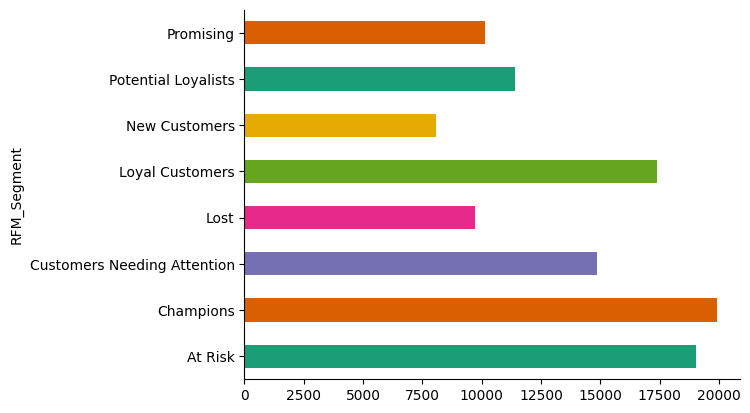

In [15]:
rfm_df.groupby('RFM_Segment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [16]:
# Select only the numeric RFM metrics for clustering
rfm_for_clustering = rfm_df[['Recency', 'Frequency', 'Monetary']]

# Create a StandardScaler instance and scale the data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_for_clustering)

# Convert back to a DataFrame for convenience
rfm_scaled_df = pd.DataFrame(rfm_scaled, index=rfm_df.index, columns=rfm_for_clustering.columns)

print("First 5 rows of the scaled data:")
print(rfm_scaled_df.head())

First 5 rows of the scaled data:
           Recency  Frequency  Monetary
user_id                                
9794320   0.598336  -0.418562 -0.505004
10079204  1.030971  -0.528059 -0.356860
10280338 -1.359907   4.070791  1.358354
12055855  0.029079  -0.418562 -0.461452
12936739 -0.608488  -0.528059 -0.310826


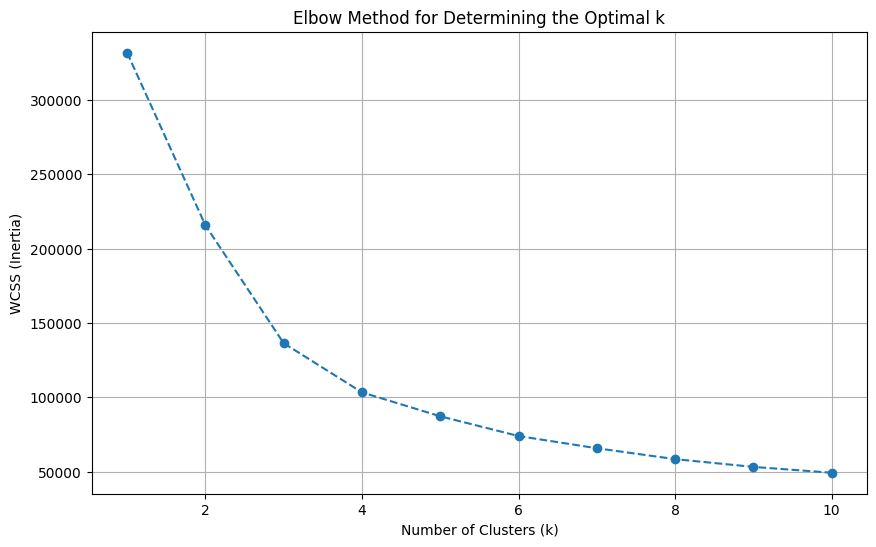

In [17]:
# Calculate the Within-Cluster Sum of Squares (WCSS) for different values of k
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(rfm_scaled_df)
    wcss.append(kmeans.inertia_)

# Plot the "elbow method" graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Determining the Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.show()

In [18]:
# Apply KMeans with the optimal k=6
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42, n_init=10)
kmeans.fit(rfm_scaled_df)

# Add a new column with the cluster number to our main RFM DataFrame
rfm_df['Cluster'] = kmeans.labels_

print("\nFirst 5 rows with the cluster number:")
print(rfm_df.head())


First 5 rows with the cluster number:
          Recency  Frequency  Monetary R_score F_score M_score RFM_Score  \
user_id                                                                    
9794320        97          4     12.68       2       2       1       221   
10079204      116          2     25.81       1       1       3       113   
10280338       11         86    177.83       5       5       5       555   
12055855       72          4     16.54       3       2       2       322   
12936739       44          2     29.89       4       1       3       413   

                  RFM_Segment  Cluster  
user_id                                 
9794320               At Risk        5  
10079204                 Lost        1  
10280338            Champions        2  
12055855  Potential Loyalists        5  
12936739        New Customers        0  


In [19]:
label_map = {
    4: "Champions / VIP",
    1: "Loyal Customers",
    3: "Promising / Potential Loyalists",
    0: "New Customers",
    5: "At Risk",
    2: "Lost / Hibernating"
}

# Create a new column with the labels
rfm_df['Cluster_Label'] = rfm_df['Cluster'].map(label_map)

# Check the result
print("\nDistribution of Customers Across CORRECT Clusters:")
print(rfm_df['Cluster_Label'].value_counts())

# Print the cluster characteristics again to verify
print("\nAnalysis of Average RFM Values for CORRECT Clusters:")
print(rfm_df.groupby('Cluster_Label')[['Recency', 'Frequency', 'Monetary']].mean().sort_values(by='Monetary', ascending=False))


Distribution of Customers Across CORRECT Clusters:
Cluster_Label
New Customers                      38917
At Risk                            32852
Loyal Customers                    26619
Promising / Potential Loyalists     9867
Lost / Hibernating                  2117
Champions / VIP                      146
Name: count, dtype: int64

Analysis of Average RFM Values for CORRECT Clusters:
                                    Recency   Frequency     Monetary
Cluster_Label                                                       
Champions / VIP                   23.876712  234.164384  1198.359178
Lost / Hibernating                34.786963   89.310817   426.646519
Promising / Potential Loyalists   47.336881   35.983582   169.551517
New Customers                     27.610273    7.376699    37.465759
Loyal Customers                  129.224464    7.209925    36.721448
At Risk                           83.940673    6.991903    35.350230


In [20]:
fig = px.scatter_3d(rfm_df,
                    x='Recency',
                    y='Frequency',
                    z='Monetary',
                    color='Cluster_Label',
                    title='3D Visualization of RFM Clusters',
                    hover_data=['Recency', 'Frequency', 'Monetary'],
                    width=900, height=700)

fig.update_layout(scene=dict(
                    xaxis_title='Recency (Days Since Last Purchase)',
                    yaxis_title='Frequency (Number of Purchases)',
                    zaxis_title='Monetary (Purchase Amount)'),
                    margin=dict(l=0, r=0, b=0, t=40))

fig.show()

# Funnel

In [21]:
import plotly.graph_objects as go

# Ensure that event_type exists and has no missing values
data.dropna(subset=['event_type'], inplace=True)

# Step 1: Create flags for each funnel stage for each user
funnel_steps = data.groupby('user_id')['event_type'].apply(set).reset_index()

funnel_steps['view'] = funnel_steps['event_type'].apply(lambda x: 'view' in x)
funnel_steps['cart'] = funnel_steps['event_type'].apply(lambda x: 'cart' in x)
funnel_steps['purchase'] = funnel_steps['event_type'].apply(lambda x: 'purchase' in x)

# Step 2: Count the number of unique users at each stage
# Important: A user who made a purchase has also viewed a product and added it to the cart.
# Therefore, we count everyone who had at least one 'view', 'cart', or 'purchase' event.
n_view = funnel_steps['view'].sum()
# We only count carts among those who have viewed
n_cart = funnel_steps[funnel_steps['view']]['cart'].sum()
# We only count purchases among those who have added to the cart
n_purchase = funnel_steps[funnel_steps['cart']]['purchase'].sum()

print(f"Number of users who viewed a product (View): {n_view}")
print(f"Number of users who added to cart (Cart): {n_cart}")
print(f"Number of users who purchased (Purchase): {n_purchase}")

# Step 3: Calculate conversion rates
cvr_view_to_cart = n_cart / n_view if n_view > 0 else 0
cvr_cart_to_purchase = n_purchase / n_cart if n_cart > 0 else 0
cvr_total = n_purchase / n_view if n_view > 0 else 0

print(f"\nConversion from view to cart: {cvr_view_to_cart:.2%}")
print(f"Conversion from cart to purchase: {cvr_cart_to_purchase:.2%}")
print(f"Overall conversion (from view to purchase): {cvr_total:.2%}")


# Step 4: Visualize the funnel
fig = go.Figure(go.Funnel(
    y = ["View", "Add to Cart", "Purchase"],
    x = [n_view, n_cart, n_purchase],
    textinfo = "value+percent initial",
    marker = {"color": ["#004c6d", "#4b85a6", "#88c0df"]}
))

fig.update_layout(title_text="User Conversion Funnel")
fig.show()

Number of users who viewed a product (View): 1597754
Number of users who added to cart (Cart): 358026
Number of users who purchased (Purchase): 109607

Conversion from view to cart: 22.41%
Conversion from cart to purchase: 30.61%
Overall conversion (from view to purchase): 6.86%


# Top 10 Brands by Conversion Rate (CVR)

In [22]:
# Count the number of events of each type for each brand
brand_funnel = data.groupby(['brand', 'event_type']).size().unstack(fill_value=0)

# Keep only those brands that have had all three event types, or at least views
brand_funnel = brand_funnel[brand_funnel['view'] > 0]
# Add columns that might be missing
for col in ['view', 'cart', 'purchase']:
    if col not in brand_funnel.columns:
        brand_funnel[col] = 0

# Calculate the CVR from view to purchase
brand_funnel['cvr'] = brand_funnel['purchase'] / brand_funnel['view']

# Display the top 10 brands by CVR
print("\n--- Top 10 Brands by Conversion Rate (CVR) ---")
print(brand_funnel.sort_values(by='cvr', ascending=False).head(10)[['view', 'purchase', 'cvr']])

# Now, do the same analysis for categories
category_funnel = data.groupby(['category_id', 'event_type']).size().unstack(fill_value=0)

# The following code repeats the logic for categories
category_funnel = category_funnel[category_funnel['view'] > 0]

for col in ['view', 'cart', 'purchase']:
    if col not in category_funnel.columns:
        category_funnel[col] = 0

category_funnel['cvr'] = category_funnel['purchase'] / category_funnel['view']

print("\n--- Top 10 Categories by Conversion Rate (CVR) ---")
print(category_funnel.sort_values(by='cvr', ascending=False).head(10)[['view', 'purchase', 'cvr']])


--- Top 10 Brands by Conversion Rate (CVR) ---
event_type   view  purchase       cvr
brand                                
eunyul       1823      1141  0.625891
dermal       1954      1072  0.548618
cosima        128        67  0.523438
supertan      582       283  0.486254
elskin       1798       759  0.422136
soleo        3320      1235  0.371988
severina    26333      9173  0.348346
swarovski   12909      4031  0.312263
benovy       7873      2180  0.276896
nitrile      1691       468  0.276759

--- Top 10 Categories by Conversion Rate (CVR) ---
event_type            view  purchase       cvr
category_id                                   
1487580011476025461    977       717  0.733879
1487580007592100809   4454      3001  0.673776
1487580009622143014   2138      1429  0.668382
1487580010821714008   9524      4841  0.508295
2055161088059638328   8442      4251  0.503554
1487580009286598681  69864     33862  0.484685
1487580011425693811   4622      2209  0.477932
1487580010796548183  

# User Behavioral Profile

In [23]:
# 1. Number of events (views, carts, purchases)
user_events = data.groupby(['user_id', 'event_type']).size().unstack(fill_value=0)
user_events.columns = [f'{col}_count' for col in user_events.columns]

# 2. Frequency (number of unique sessions)
user_frequency = data.groupby('user_id')['user_session'].nunique().to_frame('session_count')

# 3. Average session duration
session_duration = data.groupby(['user_id', 'user_session'])['event_time'].agg(['min', 'max'])
session_duration['duration_sec'] = (session_duration['max'] - session_duration['min']).dt.total_seconds()
avg_session_duration = session_duration.groupby('user_id')['duration_sec'].mean().to_frame('avg_session_duration_sec')

# 4. Number of unique categories
unique_categories = data.groupby('user_id')['category_id'].nunique().to_frame('unique_categories_count')

# Combine everything into one table
behavioral_df = user_events.join(user_frequency)\
                           .join(avg_session_duration)\
                           .join(unique_categories)\
                           .fillna(0)

print("--- User Behavioral Profile ---")
print(behavioral_df.head())

--- User Behavioral Profile ---
         cart_count  purchase_count  remove_from_cart_count  view_count  \
user_id                                                                   
465496            0               0                       0           3   
1120748           0               0                       0           1   
1180452           0               0                       0           1   
1458813           0               0                       0          31   
2038666           0               0                       0           1   

         session_count  avg_session_duration_sec  unique_categories_count  
user_id                                                                    
465496               2                     58.00                        1  
1120748              1                      0.00                        1  
1180452              1                      0.00                        1  
1458813              4                    947.25              

In [24]:
# Scale the data
scaler = StandardScaler()
behavioral_scaled = scaler.fit_transform(behavioral_df)

# Apply KMeans
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42, n_init=10)
behavioral_df['Cluster'] = kmeans.fit_predict(behavioral_scaled)

In [25]:

cluster_summary = behavioral_df.groupby('Cluster').mean()
print(cluster_summary)

label_map = {
    0: "Newcomers / Casual Visitors",
    1: "Promising / Active Shoppers",
    2: "Decisive Shoppers (Session Anomaly)",
    3: "Champions / VIP",
    4: "Loyal / Regular Shoppers",
    5: "Bots / Scrapers"
}

# Apply the new, correct labels
behavioral_df['Cluster_Label'] = behavioral_df['Cluster'].map(label_map)



          cart_count  purchase_count  remove_from_cart_count    view_count  \
Cluster                                                                      
0           1.239837        0.183683                0.461491      3.123214   
1          41.750711       11.288478               31.550212     53.906000   
2          41.864416       11.260986               39.536442     53.873526   
3         790.015291       89.024465             1056.305810    653.425076   
4         183.209907       50.808745              169.995872    221.229628   
5        1602.333333       15.666667              783.000000  12395.666667   

         session_count  avg_session_duration_sec  unique_categories_count  
Cluster                                                                    
0             1.892550              3.735093e+03                 1.798911  
1            18.375374              3.654828e+04                20.807192  
2             1.025188              8.694572e+06                17.5905

In [26]:
# --- ACTIONABLE INSIGHTS ---

# 1. Filter out the bots for any real analysis
clean_behavioral_df = behavioral_df[behavioral_df['Cluster_Label'] != 'Bots / Scrapers']

# Check the new distribution
print("\nDistribution of Customers Across CORRECT Behavioral Segments:")
print(clean_behavioral_df['Cluster_Label'].value_counts())

# 3. Print the summary again with the correct labels to confirm
print("\nAnalysis of Average Values for CORRECT Behavioral Clusters:")
print(clean_behavioral_df.groupby('Cluster_Label').mean().sort_values(by='purchase_count', ascending=False))


Distribution of Customers Across CORRECT Behavioral Segments:
Cluster_Label
Newcomers / Casual Visitors            1576142
Promising / Active Shoppers              54479
Loyal / Regular Shoppers                  6541
Decisive Shoppers (Session Anomaly)       1866
Champions / VIP                            327
Name: count, dtype: int64

Analysis of Average Values for CORRECT Behavioral Clusters:
                                     cart_count  purchase_count  \
Cluster_Label                                                     
Champions / VIP                      790.015291       89.024465   
Loyal / Regular Shoppers             183.209907       50.808745   
Promising / Active Shoppers           41.750711       11.288478   
Decisive Shoppers (Session Anomaly)   41.864416       11.260986   
Newcomers / Casual Visitors            1.239837        0.183683   

                                     remove_from_cart_count  view_count  \
Cluster_Label                                           

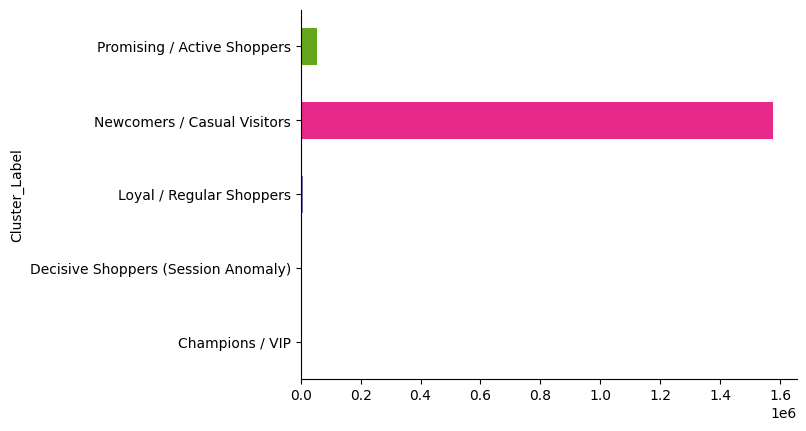

In [31]:
clean_behavioral_df.groupby('Cluster_Label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [28]:

rfm_selected = rfm_df[['Recency', 'Frequency', 'Monetary', 'Cluster_Label']].rename(
    columns={'Cluster_Label': 'RFM_Segment'}
)
behavioral_selected = behavioral_df[['Cluster_Label']].rename(
    columns={'Cluster_Label': 'Behavioral_Segment'}
)

print("--- RFM table ---")
print(rfm_selected.head())

print("\n--- User Behavioral Profile table---")
print(behavioral_selected.head())

--- RFM table ---
          Recency  Frequency  Monetary         RFM_Segment
user_id                                                   
9794320        97          4     12.68             At Risk
10079204      116          2     25.81     Loyal Customers
10280338       11         86    177.83  Lost / Hibernating
12055855       72          4     16.54             At Risk
12936739       44          2     29.89       New Customers

--- User Behavioral Profile table---
                  Behavioral_Segment
user_id                             
465496   Newcomers / Casual Visitors
1120748  Newcomers / Casual Visitors
1180452  Newcomers / Casual Visitors
1458813  Newcomers / Casual Visitors
2038666  Newcomers / Casual Visitors


In [29]:
master_profile_df = rfm_selected.join(behavioral_selected)

print("\n--- Master profile profile ---")
print(master_profile_df.head())


--- Master profile profile ---
          Recency  Frequency  Monetary         RFM_Segment  \
user_id                                                      
9794320        97          4     12.68             At Risk   
10079204      116          2     25.81     Loyal Customers   
10280338       11         86    177.83  Lost / Hibernating   
12055855       72          4     16.54             At Risk   
12936739       44          2     29.89       New Customers   

                           Behavioral_Segment  
user_id                                        
9794320           Promising / Active Shoppers  
10079204          Newcomers / Casual Visitors  
10280338             Loyal / Regular Shoppers  
12055855  Decisive Shoppers (Session Anomaly)  
12936739          Newcomers / Casual Visitors  


In [30]:
master_profile_df.dropna(inplace=True)
master_profile_df.to_csv('/content/drive/MyDrive/Data for GC/Marketing Juwelery/total_file.csv', index=True) # index=True збереже user_id
print("\nFile 'master_customer_profiles.csv' was saved")


File 'master_customer_profiles.csv' was saved
